<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI2025/blob/main/Semana9/DescensoGraidienteSL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [100]:
import os
os.chdir('/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI2025/Semana9/')
!ls

DescensoGraidienteSL.ipynb  training.pdf


In [101]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [102]:
def Plotter(e):

  fig = plt.figure(figsize=(6,3))
  ax = fig.add_subplot(121)
  ax1 = fig.add_subplot(122)

  ax.set_title('Epoch: {:.0f}'.format(e),fontsize=10)

  return fig,ax,ax1

In [103]:
G =(lambda x,y,z: 3*x - y - z - 1., \
    lambda x,y,z: -x + 3*y + z - 3., \
    lambda x,y,z: 2*x + y + 4*z - 7.)

In [104]:
G1 = np.array([lambda x,y: np.log(x**2+y**2) - np.sin(x*y) - np.log(2) - np.log(np.pi),
              lambda x,y: np.exp(x-y)+np.cos(x*y)])

In [105]:
def GetF(G,r):

  n = r.shape[0]
  v = np.zeros(n)

  for i in range(n):
    v[i] = G[i](*r)

  return v

In [106]:
GetF(G,np.array([0.,10.,0.]))

array([-11.,  27.,   3.])

In [107]:
def Metric(G,r):
  return 0.5*np.linalg.norm(GetF(G,r))

In [108]:
Metric(G,np.array([0.,5.,3.]))

np.float64(10.074720839804943)

In [109]:
def GetJacobian(f,r,h=1e-3):

  n = r.shape[0]

  J = np.zeros((n,n))

  for i in range(n):
    for j in range(n):

      rf = r.copy()
      rb = r.copy()

      rf[j] = rf[j] + h
      rb[j] = rb[j] - h

      J[i,j] = (f[i](*rf) - f[i](*rb))/(2*h)

  return J

In [110]:
J = GetJacobian(G,np.array([0.,0.,1.]))
J

array([[ 3., -1., -1.],
       [-1.,  3.,  1.],
       [ 2.,  1.,  4.]])

In [111]:
def Minimizer(G,r,lr=5e-3,epochs=int(1e5),error=1e-3):

  metric = 1
  it = 0

  M = np.array([])
  history = np.array([r])

  while metric > error and it < epochs:

    M = np.append(M,Metric(G,r))

    J = GetJacobian(G,r)
    Vector = GetF(G,r)

    # Algoritmo
    r = r - lr*np.dot(J.T,Vector)

    history = np.vstack((history,r))

    metric = Metric(G,r)

    if it % 100 == 0:
      clear_output(wait=True)
      _,ax,ax1 = Plotter(it)
      ax.plot(history[:it])
      ax.legend(['$u_{}$: {:.8}'.format(i, r[i]) for i in range(len(r))])
      ax1.plot(M[:it],color='k',label='Metric {:.3f}'.format(M[-1]))
      ax1.legend()

      plt.show()

      time.sleep(0.01)

    it += 1

  # Cuando termine guardamos la grafica
  _,ax,ax1 = Plotter(it)
  ax.plot(history[:it])
  ax.legend(['$u_{}$: {:.8}'.format(i, r[i]) for i in range(len(r))])
  ax1.plot(M[:it],color='k',label='Metric {:.3f}'.format(M[-1]))
  ax1.legend()
  plt.savefig('training.pdf')

  return r

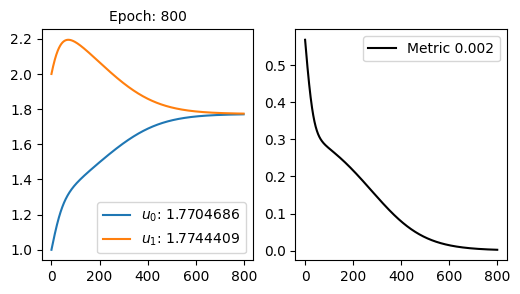

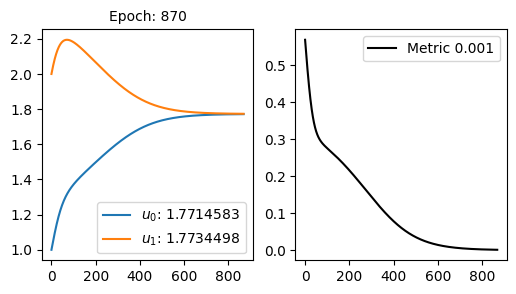

In [112]:
xsol = Minimizer(G1,np.array([1.,2.]))

In [113]:
xsol

array([1.77145834, 1.77344981])

In [114]:
GetF(G1,xsol)

array([ 3.84497757e-07, -1.98948755e-03])